# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*

## Chapter 3: Handling images

<font color=red>


- Check whether normalization code is useful.
- Perhaps use my image to show that 0-255 range would have led to loss of information.
    - similar to https://bioimagebook.github.io/chapters/1-concepts/3-bit_depths/python.html
    
</font>

### Data types determine what information can be stored

#### Types of data
Multiple data types exist. There are three important distinctions between these types:
- Signed or unsigned; 
    - Whether negative values can be stored.
    - **Relevance:** usually only positive numbers are used in images, so you won't see the 'signed' format often.
- The bit-depth; 
    - Determines how many values can be stored, e.g. 0-255 values for a bit depth of 8 (unsigned).
    - Being able to store more values also takes more disk space.
    - **Relevance:** especially when generating large amounts of images, a trade-off between storage requirements and value range becomes important. Typically, you'll use 8-bit or 16-bit images.
- Integer vs. Floating Point;
    - Integer can only store whole numbers.
    - Floating Point is a [technically more complicated]((https://en.wikipedia.org/wiki/Double-precision_floating-point_format)) format, which can store (very large and very small) numbers with a decimal point, such as 2.0005, 3.14159, 100023.93, et cetera.
    - **Relevance:** Floating point images are often used in intermediate steps of image processing, but are rarely used for storing raw images.
    
The table below summarizes common image data formats. In practice, **uint8** and **uint16** are used most frequently.

| Type             | Bit-depth | dtype     | Values |
| ---------------- | --------- | --------- | ------- |
| Unsigned integer | 8         | `uint8`   | 0 to 255 |
| Signed integer   | 8         | `int8`    | -128 to 127 |
| Unsigned integer | 16        | `uint16`  | 0 to 65535 |
| Signed integer   | 16        | `int16`   | -32768 to 32767 |
| Unsigned integer | 32        | `uint32`  | 0 to 4,294,967,295 |
| Signed integer   | 32        | `int32`   | -2,147,483,648 to 2,147,483,647 |
| Floating point   | 32        | `float32` | -3.4E+38 to 3.4E+38 [*](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) |
| Floating point   | 64        | `float64` | [**](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) |

 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tifffile as tiff
import numpy as np

The type of this image is:  uint16
uint16 has  65536  possible values


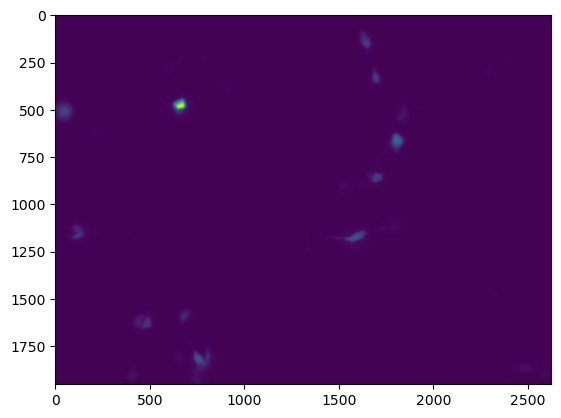

In [ ]:
# Load a picture of fluorescently labeled HeLa cells
img_path = 'images/biological/exampleHeLa.tif'
img_HeLa = tiff.imread(img_path)

# Display information about the image
print('The type of this image is: ', img_HeLa.dtype)
print('uint16 has ', 2**16, ' possible values')

# Show the image
_ = plt.imshow(img_HeLa, cmap='viridis')

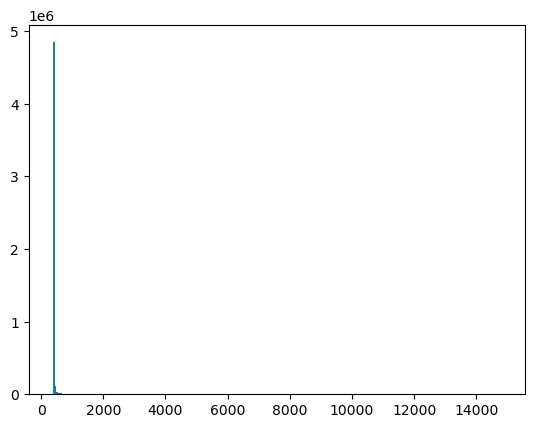

In [23]:
# Use hist to investigate why cells appear so "bleak"
_ = plt.hist(img_HeLa.ravel(), bins=256)

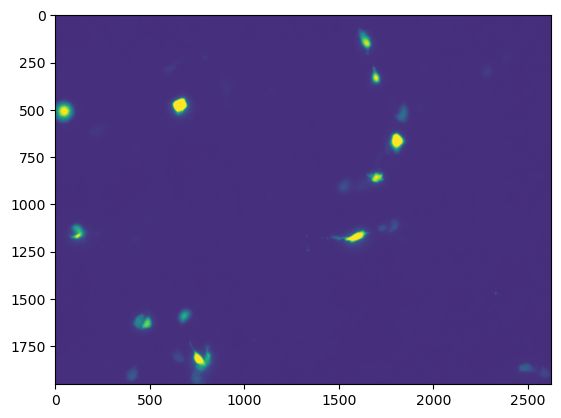

In [ ]:
# Display the value range more conveniently
_ = plt.imshow(img_HeLa, cmap='viridis', vmin=0, vmax=3000)

In [26]:
# Image statistics
print('Mean: ',img_HeLa.mean())
print('Min: ', img_HeLa.min())
print('Max: ', img_HeLa.max())
print('Standard dev: ', img_HeLa.std())

# Now the mode and percentiles
print('Mode: ', np.bincount(img_HeLa.ravel()).argmax())
print('5th percentile: ', np.percentile(img_HeLa, 5))
print('95th percentile: ', np.percentile(img_HeLa, 95))

Mean:  430.6844697667808
Min:  324
Max:  14822
Standard dev:  277.61160166795554
Mode:  403
5th percentile:  393.0
95th percentile:  441.0


New maximum determined at:  3817.0


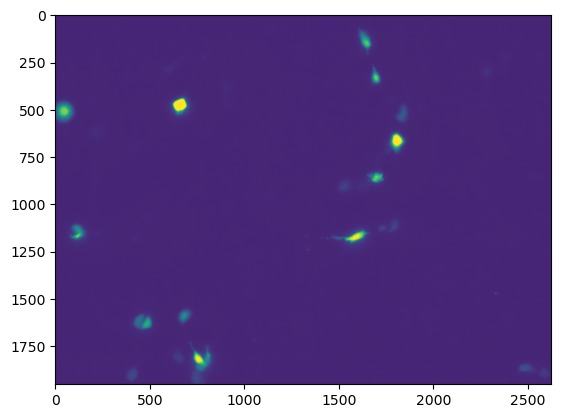

In [ ]:
# For further image processing we could remove outliers from the image
new_max = np.percentile(img_HeLa, 99.9)
print('New maximum determined at: ', new_max)
img_HeLa_norm = img_HeLa.copy()
img_HeLa_norm[img_HeLa_norm > new_max] = new_max
img_HeLa_norm = (img_HeLa_norm / new_max) * 2**16
# Show the result
_ = plt.imshow(img_HeLa_norm, cmap='viridis', vmin=0, vmax=2**16)

# Don't throw away your raw images! 
# If you save modified images like this, create a copy.

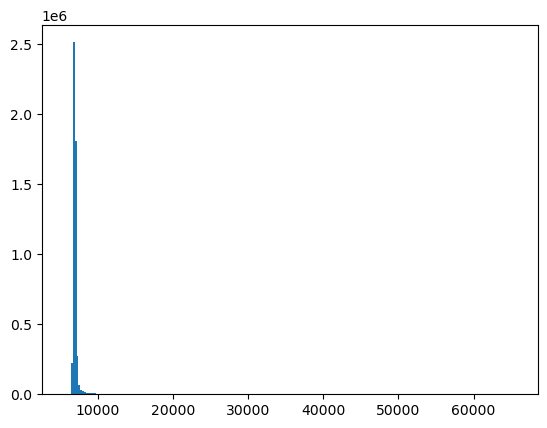

In [24]:
_ = plt.hist(img_HeLa_norm.ravel(), bins=256)